In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [306]:
# Read the csvs
df = pd.read_csv("dataset/train.csv")
testdf = pd.read_csv("dataset/test.csv")
df.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [307]:
# get details about the datasets
def print_shapes():
    print("Training data shape : {}".format(df.shape))
    print("Testing data shape : {}".format(testdf.shape))

print_shapes()

Training data shape : (1460, 81)
Testing data shape : (1459, 80)


In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [309]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [310]:
# get all the cols
cols = df.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [311]:
# get all the cols where entries are not full
# output format ex: {Missing col : missing entries}

incomplete_cols={col_entry:df['Id'].count()-df[col_entry].count() for col_entry in cols if df[col_entry].count()!= df['Id'].count()}
incomplete_cols= sorted(incomplete_cols.items(), key= lambda x:x[1], reverse= True)
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

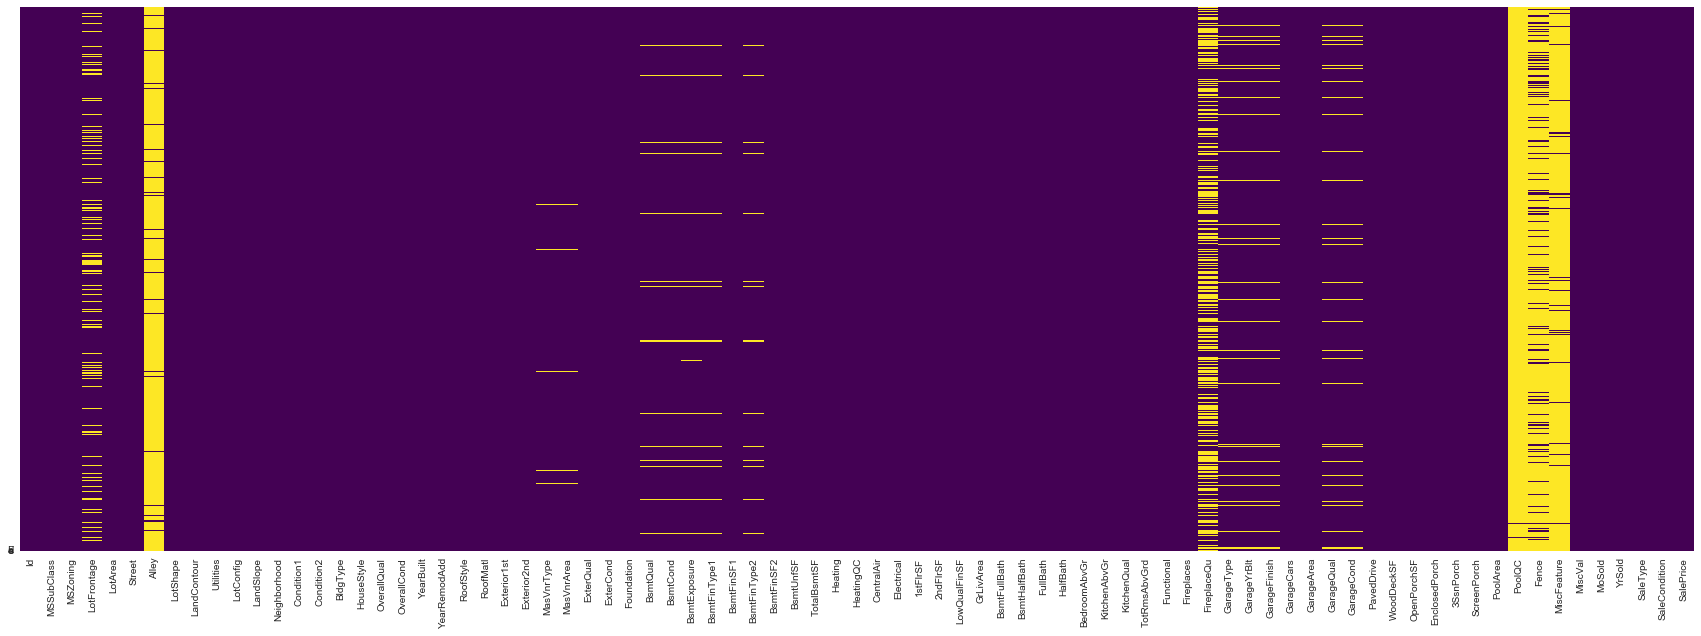

In [312]:
# plot a heatmap to indicate null values
# yellow indicates null values in that column
fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df.isnull(),yticklabels = "False",cbar=False,cmap='viridis')

# Handling the Training Dataset

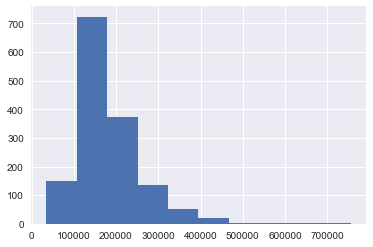

In [313]:
# sale price for houses
df['SalePrice'].hist()

In [314]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [315]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [316]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [317]:
incomplete_cols

[('PoolQC', 1453),
 ('MiscFeature', 1406),
 ('Alley', 1369),
 ('Fence', 1179),
 ('FireplaceQu', 690),
 ('LotFrontage', 259),
 ('GarageType', 81),
 ('GarageYrBlt', 81),
 ('GarageFinish', 81),
 ('GarageQual', 81),
 ('GarageCond', 81),
 ('BsmtExposure', 38),
 ('BsmtFinType2', 38),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtFinType1', 37),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('Electrical', 1)]

In [318]:
df['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

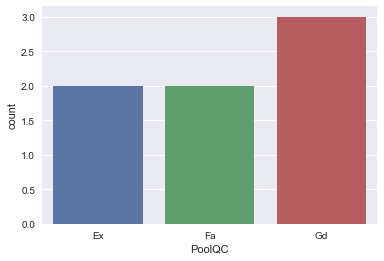

In [319]:
sns.countplot(data=df,x='PoolQC')

In [320]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

concatDFs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],keys=['Train','Test'],axis=1)
naDfs = pd.DataFrame(concatDFs)
naDfs[naDfs.sum(axis=1)>0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [321]:
# drop those values where many values are missing for both test and train
# threshold: 600, i.e if the values are more than 600, then drop those cols.

df.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1 ,inplace=True)
testdf.drop(['Alley','Fence','FireplaceQu','MiscFeature','PoolQC'],axis=1,inplace=True)

In [322]:
# check the df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [323]:
# check the test df
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [324]:
# find the correlation between price and each other col 
correlationSP = df.corr()['SalePrice'].sort_values(ascending = False)
correlationSP

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [325]:
# get features to be deleted - features where correlation is under 0.3
delete_features = correlationSP[correlationSP<0.3]
delete_features = (list(delete_features.index)) 
delete_features

['HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'Id',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

In [326]:
# drop both, train and test
df.drop(delete_features,axis=1, inplace=True)
testdf.drop(delete_features,axis=1,inplace=True)

In [327]:
# check for the dropped dataframes in both
print_shapes()

Training data shape : (1460, 57)
Testing data shape : (1459, 56)


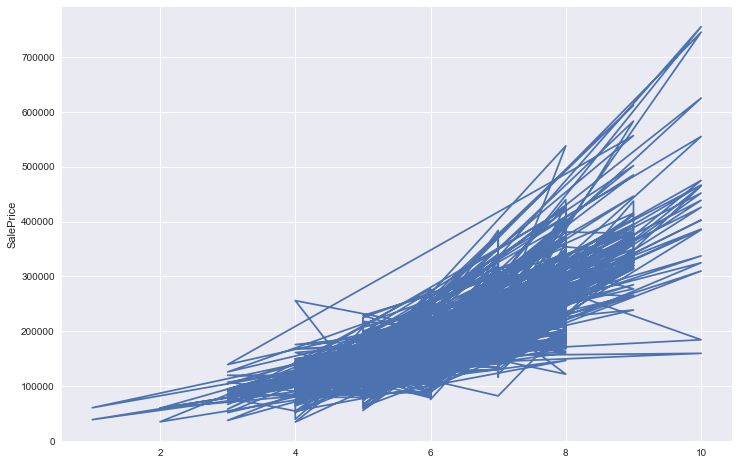

In [328]:
# fig of overallQual vs saleprice
fig,axes = plt.subplots(figsize = (12,8))
axes.plot(df['OverallQual'], df['SalePrice'])
axes.set_ylabel("OverallQual")
axes.set_ylabel("SalePrice")

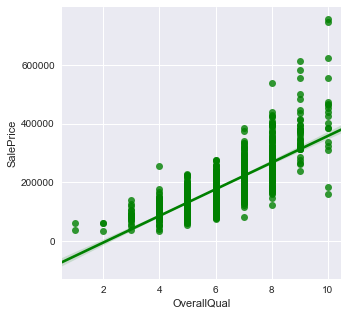

In [329]:
# Plot a regression line for overallQual vs salesprice
fig,axes = plt.subplots(figsize = (5,5))
sns.regplot(data=df, x='OverallQual',y='SalePrice',color='green')

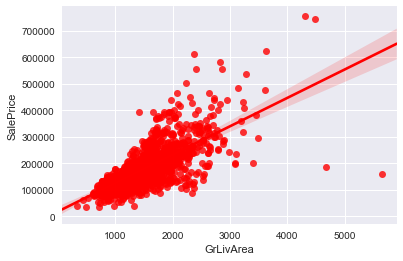

In [330]:
sns.regplot(data=df, x='GrLivArea',y='SalePrice',color='red')

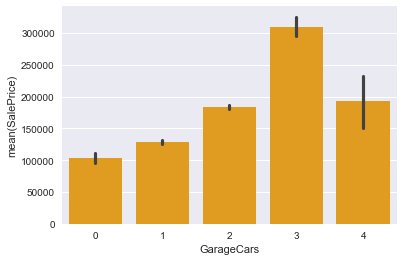

In [331]:
sns.barplot(data=df, x='GarageCars',y='SalePrice',color='orange')

In [332]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtQual,37,44.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0


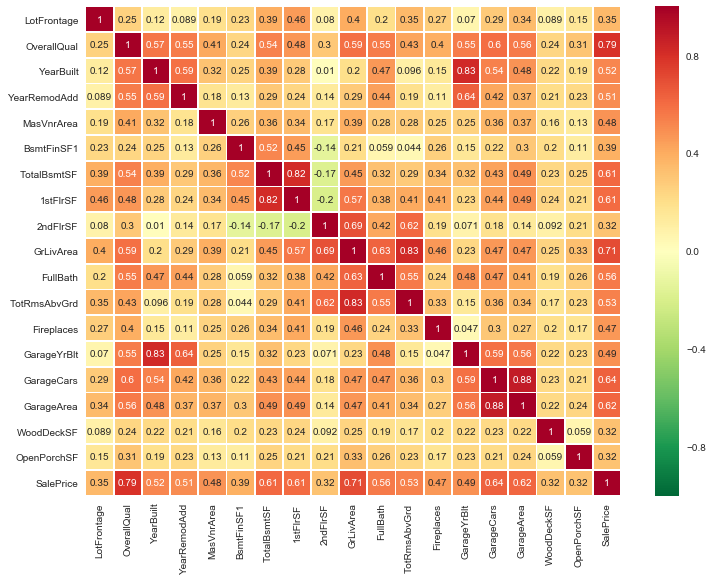

In [333]:
# look at the most missing values 
# one of which : LotFrontage	259	227.0
# now look at the most correlated values to LotFrontage
# to make it happen

# Load the datset of correlations between
corrmat = df.corr()
corrmat

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, cmap='RdYlGn_r', linewidths=0.8, annot=True)

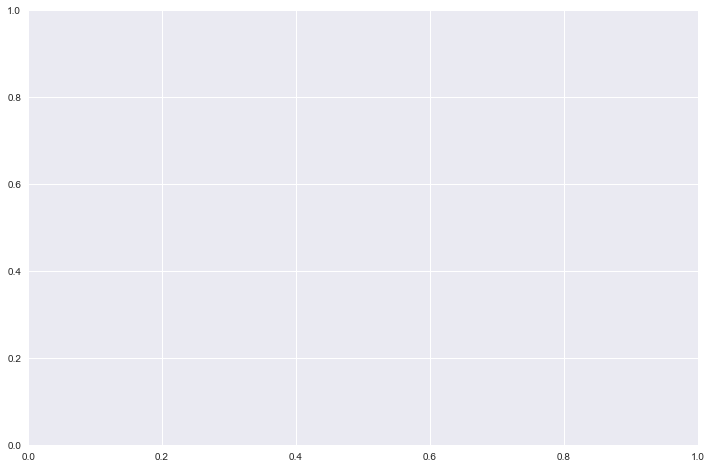

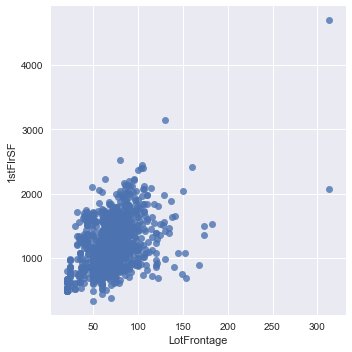

In [334]:
# 'LotFrontage' seems to have high correlation with '1stFlrSF'
# Consider boxplotting them to fill voids

fig,axes = plt.subplots(figsize=(12,8))
sns.lmplot(x='LotFrontage',y='1stFlrSF',data=df,fit_reg=False)

In [335]:
# fill empty values by building a regression model to predict the missing values
# features - pick 3 highest correlating values to LotFrontage to build a predictive model
# I prefer to choose - 'totalBsmtSf', '1stFloor', 'GRLivingArea'
to_clean_df= df[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']]
 
# only accept non empty cells
cleaned_df = to_clean_df[to_clean_df['LotFrontage'].notnull()]
cleaned_df.head()

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
0,856,856,1710,65.0
1,1262,1262,1262,80.0
2,920,920,1786,68.0
3,756,961,1717,60.0
4,1145,1145,2198,84.0


In [336]:
# prepare basic variables to apply a ML model.
X = cleaned_df[['TotalBsmtSF','1stFlrSF','GrLivArea']]
y = cleaned_df[['LotFrontage']]

In [337]:
X.shape

(1201, 3)

In [338]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


from sklearn.ensemble import RandomForestRegressor
global inner_model
inner_model = RandomForestRegressor(n_estimators=60)
inner_model.fit(X_train,y_train)


C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [339]:
predictions = inner_model.predict(X_test)
predictions 

array([  72.43333333,   53.02638889,   84.05      ,   85.22777778,
         95.88333333,   76.15      ,   90.36444444,   66.21888889,
         87.05      ,   68.71449719,   68.96666667,   43.42777778,
         71.68333333,   76.55      ,   62.        ,   46.63333333,
         76.64166667,   48.85      ,   78.96666667,   99.08333333,
         67.76630952,   80.83333333,   99.78333333,   46.75277778,
         82.35      ,   73.70138889,   92.08333333,   82.93333333,
         68.67333333,   69.52666667,   90.23333333,   69.83333333,
         65.91916667,   68.48333333,   70.36666667,   74.21666667,
         69.31666667,   76.36666667,   48.8       ,   85.78333333,
         68.36666667,   88.15      ,   75.35257937,   86.01666667,
         99.63      ,  102.85      ,   76.06111111,   73.125     ,
         84.6       ,   77.74166667,   67.01527778,   67.7       ,
         90.3       ,   61.31325397,   95.5       ,   60.        ,
         90.96666667,   82.7       ,   68.71449719,  100.26666

In [340]:
y_test

,LotFrontage
292,60.0
1238,63.0
280,82.0
82,78.0
440,105.0
355,105.0
53,68.0
1067,80.0
1027,71.0
722,70.0


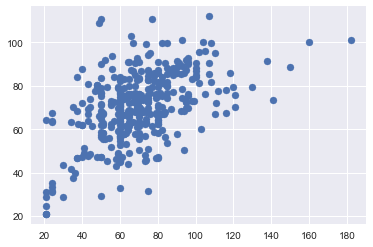

In [341]:
# roughly check the accuracy of prediction by scatter plotting
plt.scatter(y_test,predictions)

In [342]:
# check the accuracy in real
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.2525084552
MSE: 370.778215319
RMSE: 19.2556021801


In [343]:
# inner regression model seems to be fairly(supposedly 85%) accurate.
# get the empty values in df to be predicted by the model

fill_Df_train = df[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']].copy()
fill_Df_train = fill_Df_train[fill_Df_train['LotFrontage'].isnull()]
fill_Df_train.count()

TotalBsmtSF    259
1stFlrSF       259
GrLivArea      259
LotFrontage      0
dtype: int64

In [344]:
fill_Df_train['LotFrontage']=inner_model.predict(fill_Df_train[['TotalBsmtSF','1stFlrSF','GrLivArea']])
fill_Df_train['LotFrontage']

7        74.683333
12       67.794782
14       74.550000
16       48.650000
24       68.352222
31       50.700000
42       61.011111
43       66.756667
50       54.219444
64       76.550000
66       84.450000
76       56.666667
84       62.316667
95       64.733333
100      64.316667
104      71.600000
111      71.100000
113      78.900000
116      82.700000
120      72.405556
126      73.086111
131      86.600000
133      60.300000
136      67.850000
147     119.616667
149      59.786071
152      81.483333
153      74.616667
160      68.283333
166     104.858333
           ...    
1300     81.850000
1301     52.666667
1309     69.100000
1312    120.050000
1318     86.416667
1321     60.100000
1342     68.383333
1346     89.266667
1348     77.513333
1354     74.691667
1356     74.539920
1357     68.350000
1358     63.766667
1362     76.716667
1365     68.050000
1368     46.623611
1373     84.600000
1381     81.116667
1383     89.533333
1396     79.333333
1407     82.087500
1417     81.

In [345]:
# filled values for LotFrontage
fill_Df_train

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
7,1107,1107,2090,74.683333
12,912,912,912,67.794782
14,1253,1253,1253,74.550000
16,1004,1004,1004,48.650000
24,1060,1060,1060,68.352222
31,1228,1228,1228,50.700000
42,840,884,884,61.011111
43,938,938,938,66.756667
50,794,794,1470,54.219444
64,1057,1057,2034,76.550000


In [346]:
# Multiple access confusion
# refer here : https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

df[df['LotFrontage'].isnull()]['LotFrontage']=fill_Df_train['LotFrontage']


C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [347]:
# Using the .loc approach to replace values
df.loc[df['LotFrontage'].isnull(),'LotFrontage']=fill_Df_train['LotFrontage']

In [348]:
# check for any null entries in the 'LotFrontage' column of df
df['LotFrontage'].isnull().sum()

0

In [349]:
# View the df
df['LotFrontage']

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        74.683333
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       67.794782
13       91.000000
14       74.550000
15       51.000000
16       48.650000
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       68.352222
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
           ...    
1430     60.000000
1431     56.927778
1432     60.000000
1433     93.000000
1434     80.000000
1435     80.000000
1436     60.000000
1437     96.000000
1438     90.000000
1439     80.000000
1440     79.000000
1441     46.623611
1442     85.000000
1443     56.666667
1444     63.000000
1445     70.000000
1446     72.950000
1447     80.000000
1448     70.000000
1449     21.000000
1450     60.000000
1451     78.

In [350]:
# Likewise fill the test df
fill_Df_test = testdf[['TotalBsmtSF','1stFlrSF','GrLivArea','LotFrontage']]
fill_Df_test = fill_Df_test[fill_Df_test['LotFrontage'].isnull()]
fill_Df_test.count()

TotalBsmtSF    227
1stFlrSF       227
GrLivArea      227
LotFrontage      0
dtype: int64

In [351]:
fill_Df_test['LotFrontage']=inner_model.predict(fill_Df_test[['TotalBsmtSF','1stFlrSF','GrLivArea']])
fill_Df_test['LotFrontage']

6        70.783333
40       65.533333
41       27.666667
45       86.261944
47       69.666667
52       79.566667
59       53.193056
75       62.216667
82       88.616667
98       71.166667
103      84.530000
105      66.120833
107      82.266667
113      58.800000
119      74.133333
124      46.623611
132      48.375040
146      99.266667
152      74.083333
167      90.966667
174      64.900000
177      85.200000
179      73.400000
182      76.216667
183      63.666667
184      85.816667
187      77.883333
188      73.034881
199      81.166667
229      61.316667
           ...    
1224     89.916667
1240     30.933333
1243     72.240278
1244     66.400000
1246     72.250000
1247     62.912500
1248     67.794782
1249     64.821944
1254     68.250000
1255     27.666667
1264     77.566667
1267     79.183333
1277     72.297222
1278     69.783333
1281     72.850000
1304     84.600000
1347     73.650000
1350     85.325000
1351     65.950833
1352    108.416667
1354     68.293094
1355     76.

In [352]:
# filled values for LotFrontage
fill_Df_test

,TotalBsmtSF,1stFlrSF,GrLivArea,LotFrontage
6,1168.0,1187,1187,70.783333
40,756.0,756,1512,65.533333
41,530.0,530,1080,27.666667
45,1829.0,1829,1829,86.261944
47,1224.0,1287,1891,69.666667
52,533.0,1131,1775,79.566667
59,1143.0,1143,1143,53.193056
75,1008.0,1060,1245,62.216667
82,1108.0,1160,2068,88.616667
98,707.0,942,1884,71.166667


In [353]:
# Using the .loc approach to replace values
testdf.loc[testdf['LotFrontage'].isnull(),'LotFrontage']=fill_Df_test['LotFrontage']

In [354]:
# No null values for LotFrontage
testdf['LotFrontage'].isnull().sum()

0

In [355]:
# View the test values
testdf['LotFrontage']

0        80.000000
1        81.000000
2        74.000000
3        78.000000
4        43.000000
5        75.000000
6        70.783333
7        63.000000
8        85.000000
9        70.000000
10       26.000000
11       21.000000
12       21.000000
13       24.000000
14       24.000000
15      102.000000
16       94.000000
17       90.000000
18       79.000000
19      110.000000
20      105.000000
21       41.000000
22      100.000000
23       43.000000
24       67.000000
25       63.000000
26       60.000000
27       73.000000
28       92.000000
29       84.000000
           ...    
1429     50.000000
1430     75.000000
1431     69.000000
1432     50.000000
1433     60.000000
1434     41.000000
1435     44.000000
1436     69.000000
1437     65.000000
1438     70.000000
1439    140.000000
1440     85.650000
1441     76.816667
1442     95.000000
1443     88.000000
1444    125.000000
1445     78.000000
1446     41.000000
1447     58.000000
1448     81.750000
1449     21.000000
1450     21.

In [356]:
testdf['LotFrontage'].shape

(1459,)

In [357]:
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values
# Notice that 'LotFrontage' is gone!

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtQual,37,44.0
Electrical,1,0.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
Functional,0,2.0


In [358]:
naDfs.index.values 

array(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'SaleType', 'TotalBsmtSF', 'Utilities'], dtype=object)

In [359]:
# Extracts only the numeric cols
num_cols = df._get_numeric_data().columns
num_cols

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [360]:
# fill all NaN's in training df 
for element in naDfs.index.values:  
        if df[element].isnull().sum() > 0:
            if element not in num_cols:  
                df[element].fillna(df[element].mode()[0], inplace=True)
            else:
                df[element].fillna(df[element].mean(), inplace=True)

In [361]:
# Training Df is filled
df.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

In [362]:
# fill all NaN's in testing df 
for element in naDfs.index.values:  
        if testdf[element].isnull().sum() > 0:
            if element not in num_cols:  
                testdf[element].fillna(testdf[element].mode()[0], inplace=True)
            else:
                testdf[element].fillna(df[element].mean(), inplace=True)

In [363]:
# Testing Df is filled
testdf.isnull().sum()

MSZoning         0
LotFrontage      0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
FullBath         0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF  

In [364]:
# check if there are any empty values left so far
# Perfrom a concat and render a dataframe that consolidates the train and test datasets that indicates all the null entries.
# these numbers indicate the missing values
# Notice that 'LotFrontage' is gone!

naDfs = pd.concat([df.isnull().sum(),testdf.isnull().sum()],axis=1,keys=['Test','Train'])
naDfs = naDfs[naDfs.sum(axis=1)>0]
naDfs

,Test,Train


In [365]:
# seems like there are no empty values 

In [368]:
# The non numeric cols need to preprocessed before fitting.
# as mentioned here : https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float

In [369]:
# trying for sample
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['MSZoning'])
le.classes_

array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)

In [370]:
le.transform(df['MSZoning'])

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [371]:
arr = le.transform(df['MSZoning'])
len(arr)

1460

In [378]:
# get and apply label encoder for categorical cols in the training dataset
for col in df.columns:
    if col not in num_cols:
        le.fit(df[col])
        df[col] = le.transform(df[col])
df        

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
0,3,65.000000,1,3,3,0,4,0,5,2,...,2,548,4,4,2,0,61,8,4,208500
1,3,80.000000,1,3,3,0,2,0,24,1,...,2,460,4,4,2,298,0,8,4,181500
2,3,68.000000,1,0,3,0,4,0,5,2,...,2,608,4,4,2,0,42,8,4,223500
3,3,60.000000,1,0,3,0,0,0,6,2,...,3,642,4,4,2,0,35,8,0,140000
4,3,84.000000,1,0,3,0,2,0,15,2,...,3,836,4,4,2,192,84,8,4,250000
5,3,85.000000,1,0,3,0,4,0,11,2,...,2,480,4,4,2,40,30,8,4,143000
6,3,75.000000,1,3,3,0,4,0,21,2,...,2,636,4,4,2,255,57,8,4,307000
7,3,74.683333,1,0,3,0,0,0,14,4,...,2,484,4,4,2,235,204,8,4,200000
8,4,51.000000,1,3,3,0,4,0,17,0,...,2,468,1,4,2,90,0,8,0,129900
9,3,50.000000,1,3,3,0,0,0,3,0,...,1,205,2,4,2,0,4,8,4,118000


In [380]:
# get the numerical cols now after updating label encoders
df._get_numeric_data().columns.shape

(57,)

In [461]:
# Performing the same for testing dataset.
for col in testdf.columns:
    if col not in num_cols:
        le.fit(testdf[col])
        testdf[col] = le.transform(testdf[col])
testdf        

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,2,80.000000,1,3,3,0,4,0,12,1,...,2,1.0,730.0,3,4,2,140,0,8,4
1,3,81.000000,1,0,3,0,0,0,12,2,...,2,1.0,312.0,3,4,2,393,36,8,4
2,3,74.000000,1,0,3,0,4,0,8,2,...,0,2.0,482.0,3,4,2,212,34,8,4
3,3,78.000000,1,0,3,0,4,0,8,2,...,0,2.0,470.0,3,4,2,360,36,8,4
4,3,43.000000,1,0,1,0,4,0,22,2,...,1,2.0,506.0,3,4,2,0,82,8,4
5,3,75.000000,1,0,3,0,0,0,8,2,...,0,2.0,440.0,3,4,2,157,84,8,4
6,3,70.783333,1,0,3,0,4,0,8,2,...,0,2.0,420.0,3,4,2,483,21,8,4
7,3,63.000000,1,0,3,0,4,0,8,2,...,0,2.0,393.0,3,4,2,0,75,8,4
8,3,85.000000,1,3,3,0,4,0,8,2,...,2,2.0,506.0,3,4,2,192,0,8,4
9,3,70.000000,1,3,3,0,0,0,12,2,...,0,2.0,525.0,3,4,2,240,0,8,4


In [382]:
# Performing Testing and Training for the Dataset

In [383]:
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'],axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [384]:
# Everything is now converted to numerical cols

# Trying Different Regression Models before Finalizing

Random Forest Regressor

In [418]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=160)
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=160, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [439]:
predictions_random_forest = random_forest_model.predict(X_test)
predictions_random_forest

array([ 140055.9375 ,  317340.1125 ,  115878.34375,  158850.3125 ,
        313516.98125,   83695.3125 ,  196532.58125,  152121.875  ,
         83142.8125 ,  124630.2375 ,  156997.525  ,  116826.25   ,
        107093.75   ,  204411.4    ,  179397.25   ,  128142.34375,
        194812.84375,  134810.78125,  120306.09375,  203692.16875,
        170803.7625 ,  226127.50625,  175567.35   ,  123876.5875 ,
        190328.525  ,  170338.00625,  185203.975  ,  102194.6875 ,
        179350.8125 ,  200892.53125,  123901.7625 ,  246674.64375,
        193550.25   ,  110620.3125 ,  253881.46875,  148527.34375,
        142950.11875,  203508.0875 ,  294294.61875,  106524.0875 ,
        125802.25   ,  239123.00625,  118877.1875 ,  365853.48125,
        135551.375  ,  147711.81875,  115625.     ,  126921.875  ,
        385590.71875,  140901.29375,  118543.59375,  202610.5375 ,
        127340.2125 ,  338767.58125,  139943.5    ,  242287.01875,
        200723.275  ,  150135.     ,  146354.33125,  112587.5 

In [420]:
# predictions are almost the same  
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
410      60000
963     239000
582     118500
156     109500
594     110000
617     105500
447     199900
1205    271900
861     131500
1010    135000
390     119000
1409    215000
847     133500
1284    169000
Name: SalePrice, dtype: int64

In [440]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_random_forest))
print('MSE:', metrics.mean_squared_error(y_test, predictions_random_forest))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_random_forest)))

MAE: 17671.2028527
MSE: 861266813.31
RMSE: 29347.3476367


Gradient Boosting Regressor

In [422]:
from sklearn.ensemble import GradientBoostingRegressor

In [457]:
gradient_boost_model = GradientBoostingRegressor(alpha=0.92,learning_rate=0.1)
gradient_boost_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.92, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [458]:
gb_predicts = gradient_boost_model.predict(X_test)
gb_predicts

array([ 145176.54743936,  355729.97018568,  117001.82732912,
        158333.66903456,  323364.95305673,   75215.36650324,
        215421.31111506,  147595.93720448,   78039.51657322,
        119659.86593897,  148776.6569919 ,  123580.95363208,
        108548.90148526,  199187.95207071,  172200.6189375 ,
        136089.16284798,  192329.40097146,  143644.74682952,
        122581.67952596,  217536.97342822,  170711.74469203,
        221548.14465466,  170714.29026102,  134334.40521006,
        204969.64315254,  162039.2619617 ,  195030.02413838,
        107613.45186804,  178972.88750458,  192643.09967833,
        122208.86603029,  257792.38197846,  227799.10927943,
        107880.94288806,  242623.85086545,  144553.38296411,
        145521.623918  ,  209033.41127863,  293831.15113996,
         99442.46088608,  128476.51501068,  246208.2314735 ,
        124461.97548223,  390913.11999241,  128233.87924361,
        136993.81754375,  118561.40942325,  124954.37797647,
        442451.22974747,

In [459]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
1031    197000
1262    161500
1013     85000
1311    203000
566     325000
610     313000
1278    237000
1263    180500
816     137000
438      90350
940     150900
96      214000
560     121500
1182    745000
471     190000
1004    181000
410      60000
963     239000
582     118500
156     109500
594     110000
617     105500
447     199900
1205    271900
861     131500
1010    135000
390     119000
1409    215000
847     133500
1284    169000
Name: SalePrice, dtype: int64

In [460]:
print('MAE:', metrics.mean_absolute_error(y_test, gb_predicts))
print('MSE:', metrics.mean_squared_error(y_test, gb_predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_predicts)))

MAE: 17471.5404547
MSE: 977146174.965
RMSE: 31259.3374044


Seems like Gradient Boost is better.